In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para serem usadas no treinamento dos dados
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer # Aplicar transformações diferentes para diferentes colunas
from sklearn.ensemble import StackingClassifier # Meta estimador que treina outros estimadores, combinando suas previsões
from sklearn.preprocessing import OneHotEncoder # Codificar as variáveis categóricas
from sklearn.linear_model import LogisticRegression # Modelo de regressão linear que será utilizado
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modelos que serão utilizados no ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv('HR_Analytics.csv', sep=',', encoding='utf-8')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# X = data.drop('Attrition', axis=1) # Atributos
# y = data['Attrition'] # Alvo

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Verificando as formas dos conjuntos de treinamento e teste
# print("Shape of X_train:", X_train.shape)
# print("Shape of y_train:", y_train.shape)
# print("Shape of X_test:", X_test.shape)
# print("Shape of y_test:", y_test.shape)

In [5]:
# Selecionando apenas as características (excluindo a variável alvo)
feature_columns = [col for col in data.columns if col != 'Attrition']

X = data[feature_columns] # Atributos
y = data['Attrition'] # Alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Selecionando rótulos categóricos e numéricos das características
categorical_labels = data[feature_columns].select_dtypes(include=['object']).columns
numerical_labels = data[feature_columns].select_dtypes(include=['int64']).columns # DataFrame só possui numéricos no tipo int64

# Pipeline para preprocessamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_labels), # Mantém as variáveis numéricas 
        ('cat', OneHotEncoder(), categorical_labels) # Codifica as variáveis categóricas
    ]
)

In [6]:
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])

In [7]:
# Pipeline completo com pré-processamento e modelo
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

In [8]:
pipeline.fit(X_train, y_train)

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating',...
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [9]:
y_pred = pipeline.predict(X_test)

In [10]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

print(classification_report(y_test, y_pred))

Accuracy:  0.8412698412698413
              precision    recall  f1-score   support

          No       0.84      1.00      0.91       370
         Yes       1.00      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



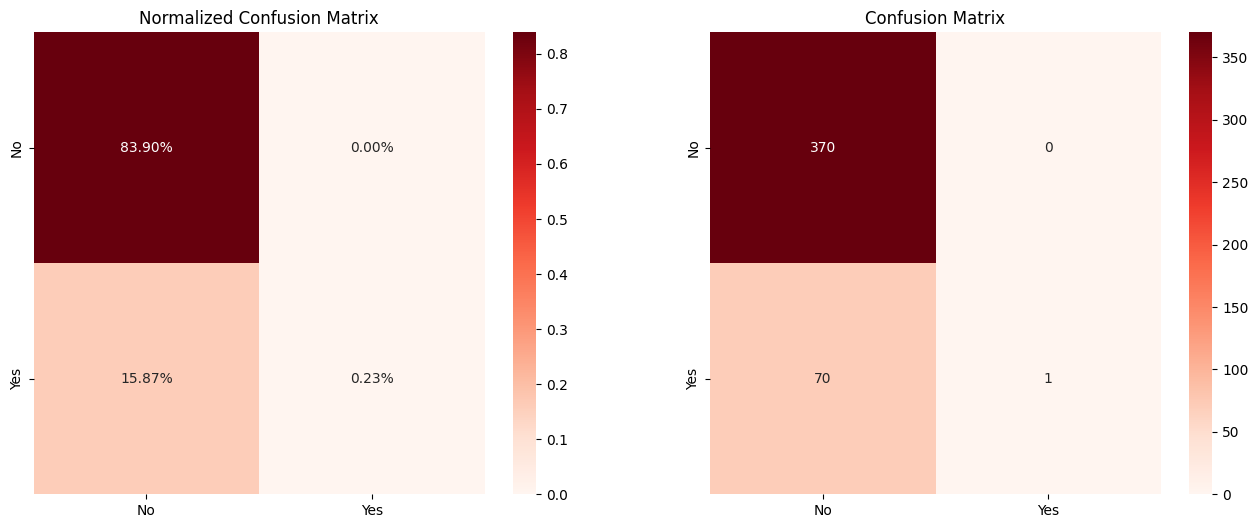

In [11]:
# Calcula a matriz de confusão normalizada
cm = confusion_matrix(y_test, y_pred)
cm_normalized = confusion_matrix(y_test, y_pred, normalize='all')

# Define a figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plota a matriz de confusão com as proporções
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[0])
axs[0].set_title('Normalized Confusion Matrix')

# Plota a matriz de confusão sem normalização
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=axs[1])
axs[1].set_title('Confusion Matrix')

plt.show()